<a href="https://colab.research.google.com/github/abhishekmishra-bareilly/Deep-Learning/blob/main/Weight_initializer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/learn outside/ushape.csv')

In [3]:
data.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


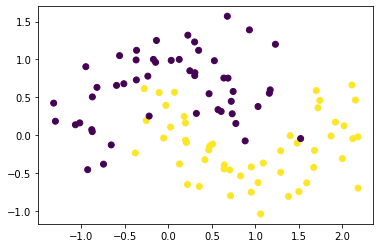

In [4]:
plt.scatter(data['X'],data['Y'],c=data['class'])

In [18]:
x = data.iloc[:,0:2].values
y = data.iloc[:,-1].values

In [19]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

## Using **xavier** weight initialization

In [20]:
# Model implimentation
model = Sequential()

#adding model dense layers

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))


# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                30        
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Check Default weights
model.get_weights()


[array([[-0.59116435, -0.37067512, -0.57624483,  0.4465354 , -0.18793076,
          0.3746968 , -0.17008746,  0.46391958, -0.19156212,  0.12104744],
        [ 0.45963973, -0.70128125, -0.00855142, -0.2858524 , -0.17212236,
          0.26056093,  0.04296535, -0.4211937 , -0.6237145 , -0.5755061 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-1.19193763e-01, -4.72715080e-01,  7.88902044e-02,
          4.77113247e-01, -2.94502974e-02, -3.85894954e-01,
         -4.84239817e-01, -4.58526015e-02, -3.42882514e-01,
          2.43787289e-01],
        [ 4.96233225e-01,  4.76612329e-01, -2.02086896e-01,
         -4.66851979e-01, -2.92716652e-01, -2.32935250e-01,
         -5.36368787e-01, -2.45711118e-01, -2.47305989e-01,
         -3.23364556e-01],
        [ 2.40610361e-01,  2.66941845e-01, -1.66560888e-01,
          1.87418163e-01, -1.87862664e-01,  1.95453286e-01,
          4.30408120e-01, -1.04340315e-02, -1.55737936e-01,
          1.5574228

In [22]:
initial_weights = model.get_weights()

In [23]:
# Weights initialization
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [24]:
# Updating weights
model.set_weights(initial_weights)

In [25]:
# New weights
model.get_weights()

[array([[-1.399606  ,  0.12645009,  0.9281094 ,  0.04835907, -0.19986628,
          0.2902256 ,  0.2738369 , -0.3276936 ,  0.33758324, -0.48068145],
        [ 0.0930077 ,  1.1592202 , -0.2721307 ,  0.8286364 ,  0.773693  ,
         -2.0395854 , -0.05636321, -0.05119044,  1.8969525 ,  0.6059197 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.1881128 , -0.15713407, -0.2888413 ,  0.26989314, -0.13615   ,
         -0.01485522,  0.01872236, -0.02268281, -0.4613746 , -0.4020529 ],
        [ 0.33405295, -0.29097027,  0.3151041 ,  0.12400564, -0.04238379,
          0.04206616, -0.16734621,  0.1983435 ,  0.19421059, -0.15580142],
        [ 0.3237426 , -0.83600485,  0.31504443,  0.1085967 , -0.13392447,
          0.28605002, -0.9235891 , -0.05875276,  0.22103742, -0.10613091],
        [-0.06524991, -0.57518923,  0.01385635, -0.32314742,  0.3471939 ,
         -1.0792754 , -0.06036639, -0.2555279 , -0.09929319, -0.36390042],
        [ 0.08636

In [26]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x,y,epochs=100,validation_split=0.2)

In [28]:
model.get_weights()

[array([[-1.5478129 ,  0.1892058 ,  0.74106723,  0.05876513, -0.23832846,
          0.42638052,  0.2547911 , -0.25392252,  0.32785827, -0.35097513],
        [ 0.07873277,  1.101369  , -0.41366047,  0.75150913,  0.8574972 ,
         -1.9498861 , -0.1640743 , -0.11515662,  1.9882164 ,  0.7285125 ]],
       dtype=float32),
 array([ 0.09625338,  0.08329146, -0.08780409,  0.03649885, -0.04723188,
         0.00852486,  0.02089772,  0.12465461, -0.07629647, -0.10249624],
       dtype=float32),
 array([[ 1.84702128e-01, -2.65820563e-01, -2.12603867e-01,
          2.95569479e-01, -1.46321177e-01, -7.39691854e-02,
         -7.38336071e-02,  6.12967312e-02, -5.95833838e-01,
         -2.97428280e-01],
        [ 2.74688691e-01, -2.06817582e-01,  2.20787331e-01,
          7.11772367e-02, -7.23393187e-02,  1.36308476e-01,
         -1.01718746e-01,  1.05506286e-01,  2.83609539e-01,
         -1.04887761e-01],
        [ 4.00704801e-01, -8.61355126e-01,  3.13173532e-01,
          1.43359333e-01, -6.12144

3888/3888 [==============================] - 5s 1ms/step


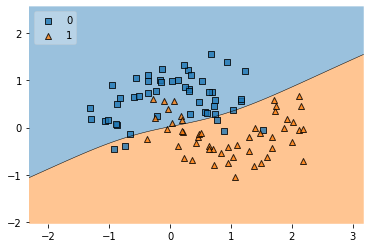

In [29]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'), clf=model, legend=2)

## using relu with **he_normal**

In [30]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                30        
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Check Default weights
model.get_weights()


[array([[ 1.1714303 , -0.8037251 ,  0.3356843 ,  1.109747  , -0.7633451 ,
         -0.12261787, -0.10794673,  0.5693995 ,  1.0709367 ,  0.2698768 ],
        [-0.21932283,  0.153752  ,  0.24756303, -1.1665925 , -0.4114906 ,
          0.33401683,  1.167785  ,  0.5193598 , -1.3696766 ,  0.5922022 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.14768213,  0.85683465,  0.47327626, -0.85158813,  0.17940478,
         -0.9039063 , -0.87816286,  0.09817513, -0.4593396 , -0.8930065 ],
        [-0.29325163,  0.0110487 , -0.92831004,  0.40804023, -0.6242649 ,
          0.14306687,  0.4765841 ,  0.40039358, -0.3993333 ,  0.13601162],
        [-0.1607114 ,  0.05125678, -0.5158454 , -0.43965414,  0.7590055 ,
         -0.24043249,  0.27495453, -0.31632787, -0.078191  ,  0.15581168],
        [-0.01217302, -0.1590333 ,  0.07480996,  0.1652924 , -0.1799571 ,
         -0.69811255,  0.55973864,  0.2088078 ,  0.28367448,  0.5394695 ],
        [-0.37550

In [32]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x,y,epochs=100,validation_split=0.2)

In [34]:
model.get_weights()

[array([[ 1.2560192 , -0.9849447 ,  0.39327013,  1.1359774 , -0.7696805 ,
         -0.3608449 , -0.06630994,  0.63511133,  1.2059048 ,  0.2805756 ],
        [-0.30950415,  0.16958214,  0.19361414, -1.2231495 , -0.41560292,
          0.24536264,  1.3319408 ,  0.62949127, -1.6464578 ,  0.7040549 ]],
       dtype=float32),
 array([-0.05468725,  0.10558073,  0.26134694,  0.12785524,  0.0825942 ,
        -0.08074581,  0.07356458, -0.16320035,  0.06523085,  0.1186161 ],
       dtype=float32),
 array([[ 0.05968113,  0.94537354,  0.5753776 , -0.9578992 ,  0.3218649 ,
         -0.9039063 , -0.89595366,  0.15932046, -0.4942445 , -0.7815988 ],
        [-0.21337381, -0.07159903, -0.92831004,  0.62009186, -0.53655195,
          0.3369379 ,  0.7097224 ,  0.28546983, -0.35709184, -0.03701184],
        [-0.01979544,  0.02660073, -0.47627002, -0.504156  ,  0.9207374 ,
         -0.34554845,  0.23953986, -0.1749339 , -0.02838419,  0.3071487 ],
        [ 0.08029833,  0.01173497,  0.2203249 ,  0.01128041, 

3888/3888 [==============================] - 5s 1ms/step


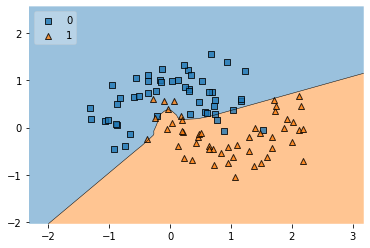

In [35]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'), clf=model, legend=2)